In [130]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/breast-cancer-survival-dataset/breast_cancer_survival.csv


## Read in Dataframe and look at columns, shape, missing values

In [131]:
df = pd.read_csv('/kaggle/input/breast-cancer-survival-dataset/breast_cancer_survival.csv')
print(df.shape)
df.head()

(334, 15)


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [132]:
#Get the number of nulls by column
df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [133]:
df.dtypes

Age                     int64
Gender                 object
Protein1              float64
Protein2              float64
Protein3              float64
Protein4              float64
Tumour_Stage           object
Histology              object
ER status              object
PR status              object
HER2 status            object
Surgery_type           object
Date_of_Surgery        object
Date_of_Last_Visit     object
Patient_Status         object
dtype: object

In [134]:
#See what genders are included in the dataset and then change the values to 0 for female and 1 for male
df.Gender.describe()
df.Gender.replace({'FEMALE':0, 'MALE': 1}, inplace = True)
#Fill NA because these NA mean that no visit has happened
df.Date_of_Last_Visit.fillna('No Visit', inplace = True)
#Replace Tumor Stage with numbers
df.Tumour_Stage.replace({'I': 1, 'II': 2, 'III' : 3}, inplace = True)
#Make data numericfor future data visualization and statistical analysis
df.Patient_Status.replace({'Alive': 0, 'Dead': 1}, inplace = True)
df[['ER status', 'PR status', 'HER2 status']] = df[['ER status', 'PR status', 'HER2 status']].replace({'Positive': 1, 'Negative': 0})
#Get dummy columns for histology to help with data analysis
dummies = pd.get_dummies(df.Histology)
df = pd.concat([df,dummies], axis = 1)
df.drop('Histology', axis = 1, inplace = True)
#Drop the rest of the NA because these do not include patient_Status which is our dependent variable
#Did not drop inplace as we may want access to these rows in the future if we change dependent variables
clean_df = df.dropna()
clean_df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
0,42,0,0.95256,2.15000,0.007972,-0.048340,2,1,1,0,Other,20-May-18,26-Aug-18,0.0,1,0,0
1,54,0,0.00000,1.38020,-0.498030,-0.507320,2,1,1,0,Other,26-Apr-18,25-Jan-19,1.0,1,0,0
2,63,0,-0.52303,1.76400,-0.370190,0.010815,2,1,1,0,Lumpectomy,24-Aug-18,08-Apr-20,0.0,1,0,0
3,78,0,-0.87618,0.12943,-0.370380,0.132190,1,1,1,0,Other,16-Nov-18,28-Jul-20,0.0,1,0,0
4,42,0,0.22611,1.74910,-0.543970,-0.390210,2,1,1,1,Lumpectomy,12-Dec-18,05-Jan-19,0.0,1,0,0


In [135]:
clean_df.describe()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,ER status,PR status,HER2 status,Patient_Status,Infiltrating Ductal Carcinoma,Infiltrating Lobular Carcinoma,Mucinous Carcinoma
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.0,321.0,321.000000,321.000000,321.000000,321.000000,321.000000
mean,58.875389,0.012461,-0.026479,0.954563,-0.093279,0.008813,2.052960,1.0,1.0,0.090343,0.205607,0.704050,0.258567,0.037383
std,12.929982,0.111105,0.546689,0.909635,0.587981,0.622491,0.656933,0.0,0.0,0.287120,0.404776,0.457181,0.438531,0.189995
min,29.000000,0.000000,-2.144600,-0.978730,-1.627400,-2.025500,1.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,-0.361650,0.368840,-0.531360,-0.378070,2.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,0.000000,0.005649,1.000300,-0.177200,0.040511,2.000000,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000
75%,68.000000,0.000000,0.336530,1.633200,0.275630,0.428860,2.000000,1.0,1.0,0.000000,0.000000,1.000000,1.000000,0.000000
max,90.000000,1.000000,1.593600,3.402200,2.193400,1.629900,3.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


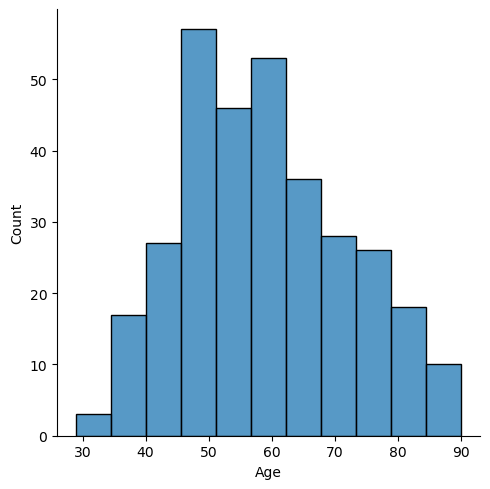

In [136]:
sns.displot(clean_df, x = 'Age')

# From the description of the data it appears that we have some issues with the data we have much more females than males and one value for PR status and ER status. 
This points to issues in data collection and the need for a larger sample with more parameters to do further predictive analysis.

## Data Visualization and Correlation

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:>

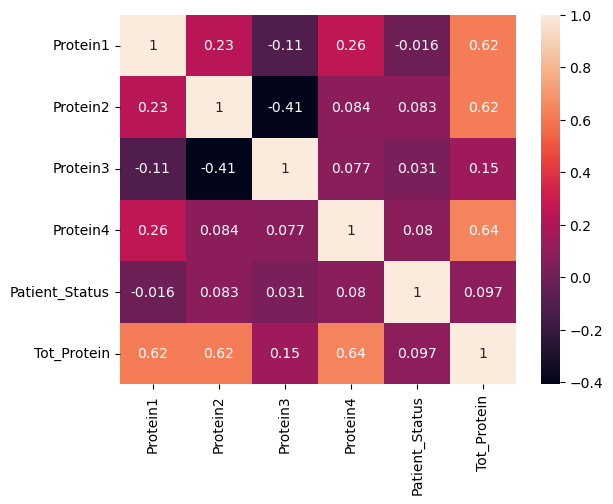

In [137]:
#Chunk data to see coorelations of proteins and various factors
proteins = clean_df[['Protein1', 'Protein2', 'Protein3', 'Protein4','Patient_Status']]
proteins.loc[:,'Tot_Protein'] = proteins.Protein1 + proteins.Protein2 + proteins.Protein3 + proteins.Protein4
sns.heatmap(proteins.corr(), annot = True)

# Patient_Status is not highly correlated with any protein individually or with the total proteins

<AxesSubplot:>

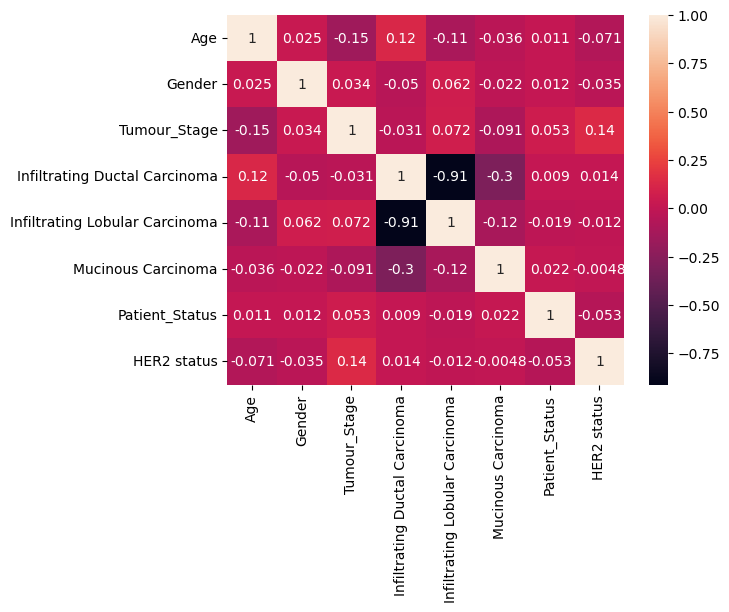

In [138]:
#Without proteins
no_protein = clean_df[['Age','Gender','Tumour_Stage','Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma','Mucinous Carcinoma','Patient_Status','HER2 status']]
sns.heatmap(no_protein.corr(), annot = True)